In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=0b777f47d8fe89a5a0e2be2c14c97daacc5b676672c287f81920d38cb78d3ea6
  Stored in directory: /root/.cache/pip/wheels/81/1b/c2/e41f4bddafe5564d11b2414a62dd7f5d75fcf65b2d7b7805c4
Successfully built pyspark


# Data Pre-Processing

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("views").getOrCreate()

df = spark.read.csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv", header=True, inferSchema=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/04/28 08:42:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


In [6]:
pd.DataFrame(df.take(10), columns=df.columns)

23/04/28 08:42:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/04/28 08:42:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Artist, Url_spotify, Track, Album, Album_type, Uri, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Url_youtube, Title, Channel, Views, Likes, Comments, Description, Licensed, official_video, Stream
 Schema: _c0, Artist, Url_spotify, Track, Album, Album_type, Uri, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Url_youtube, Title, Channel, Views, Likes, Comments, Description, Licensed, official_video, Stream
Expected: _c0 but found: 
CSV file: file:///kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


,_c0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,None,None,None
1,Follow Gorillaz online:,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,http://gorillaz.com,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,http://facebook.com/Gorillaz,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,http://twitter.com/GorillazBand,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,http://instagram/Gorillaz,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,For more information on Gorillaz don't forget ...,True,True,1040234854,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone Eyes,None,None,None
8,Rhinestone Eyes is taken from the 2010 album P...,Stylo,Superfast Jellyfish and On Melancholy Hill.,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Follow Gorillaz online:,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
df = df.drop("Url_spotify", "Uri", "Url_youtube", "Title", "Url_spotify", "Uri", "Url_youtube", "Title", "official_video", "Licensed", "Description", "Comments", "Stream",  "_c0")

In [8]:
pd.DataFrame(df.take(10), columns=df.columns)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,True,1040234854,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.0869,0.000687,0.0463,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0
8,Stylo,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [10]:
df = df.dropDuplicates()

In [11]:
df = df.filter((df.Views.isNotNull()))

In [12]:
df.show()

+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|         Artist|               Track|               Album|Album_type|Danceability|Energy| Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Duration_ms|             Channel|       Views|     Likes|
+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|        50 Cent|          In Da Club|Get Rich Or Die T...|     album|       0.902|  0.72| 6.0|  -2.776|      0.347|        0.26|             0.0|  0.0749|  0.805| 90.059|   193467.0|          50CentVEVO|1682616458.0|10481678.0|
|      Radiohead|Jigsaw Falling In...|         In Rainbows|     album|       0.462| 

In [13]:
pd.DataFrame(df.take(10), columns=df.columns)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes
0,50 Cent,In Da Club,Get Rich Or Die Tryin',album,0.902,0.72,6.0,-2.776,0.347,0.26,0.0,0.0749,0.805,90.059,193467.0,50CentVEVO,1682616458.0,10481678.0
1,Radiohead,Jigsaw Falling Into Place,In Rainbows,album,0.462,0.832,11.0,-6.085,0.0479,0.108,0.00416,0.0741,0.807,165.653,248893.0,Radiohead,26398730.0,180969.0
2,Mariah Carey,Obsessed,Memoirs of an imperfect Angel,album,0.742,0.468,10.0,-5.557,0.0625,0.0465,0.0,0.826,0.369,86.443,242200.0,MariahCareyVEVO,204281507.0,1613939.0
3,Alejandro Sanz,La fuerza del corazón,Alejandro Sanz 3,album,0.399,0.53,10.0,-7.176,0.0532,0.479,1.36e-06,0.0719,0.351,76.827,307053.0,Warner Music México,59341295.0,181862.0
4,Nelly Furtado,Maneater,Loose,album,0.796,0.777,6.0,-4.81,0.0397,0.0261,0.000358,0.121,0.787,132.722,258893.0,NellyFurtadoVEVO,114726796.0,591814.0
5,Joan Sebastian,Que Sea,Que Sea,single,0.781,0.693,0.0,-3.558,0.0308,0.701,4.45e-06,0.156,0.939,97.074,170507.0,JoanSebastianVEVO,64304761.0,302167.0
6,Lata Mangeshkar,Dil To Pagal Hai,Dil To Pagal Hai,album,0.752,0.67,6.0,-10.641,0.0465,0.306,0.000528,0.729,0.748,110.696,336118.0,YRF,207080018.0,665567.0
7,Black Sabbath,Sweet Leaf - 2014 Remaster,Master of Reality (2014 Remaster),album,0.362,0.6,2.0,-12.285,0.0463,0.00183,0.0426,0.0814,0.658,148.462,304787.0,GangstaLink,1648686.0,12407.0
8,Rod Stewart,The First Cut Is the Deepest,A Night on the Town,album,0.546,0.627,0.0,-9.037,0.0244,0.316,0.00114,0.096,0.764,81.278,271200.0,Rod Stewart,6443015.0,48603.0
9,Gwen Stefani,What You Waiting For?,Love Angel Music Baby (Deluxe Version),album,0.676,0.948,5.0,-2.557,0.0628,0.0509,8.19e-06,0.384,0.731,136.027,221227.0,GwenStefaniVEVO,63710019.0,393348.0


In [14]:
from pyspark.sql.functions import when

df = df.withColumn("Album_type", when((df.Album_type != "single") & (df.Album_type != "album"), "single").otherwise(df.Album_type))

df.show()

+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|         Artist|               Track|               Album|Album_type|Danceability|Energy| Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Duration_ms|             Channel|       Views|     Likes|
+---------------+--------------------+--------------------+----------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+------------+----------+
|        50 Cent|          In Da Club|Get Rich Or Die T...|     album|       0.902|  0.72| 6.0|  -2.776|      0.347|        0.26|             0.0|  0.0749|  0.805| 90.059|   193467.0|          50CentVEVO|1682616458.0|10481678.0|
|      Radiohead|Jigsaw Falling In...|         In Rainbows|     album|       0.462| 

In [15]:
df.printSchema()

root
 |-- Artist: string (nullable = true)
 |-- Track: string (nullable = true)
 |-- Album: string (nullable = true)
 |-- Album_type: string (nullable = true)
 |-- Danceability: string (nullable = true)
 |-- Energy: string (nullable = true)
 |-- Key: string (nullable = true)
 |-- Loudness: string (nullable = true)
 |-- Speechiness: string (nullable = true)
 |-- Acousticness: string (nullable = true)
 |-- Instrumentalness: string (nullable = true)
 |-- Liveness: string (nullable = true)
 |-- Valence: string (nullable = true)
 |-- Tempo: string (nullable = true)
 |-- Duration_ms: string (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Views: string (nullable = true)
 |-- Likes: string (nullable = true)



In [17]:
from pyspark.sql.functions import col

cols_to_convert = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Likes', 'Views']

for col_name in cols_to_convert:
    df = df.withColumn(col_name, col(col_name).cast("double"))

In [18]:
df.printSchema()

root
 |-- Artist: string (nullable = true)
 |-- Track: string (nullable = true)
 |-- Album: string (nullable = true)
 |-- Album_type: string (nullable = true)
 |-- Danceability: double (nullable = true)
 |-- Energy: double (nullable = true)
 |-- Key: double (nullable = true)
 |-- Loudness: double (nullable = true)
 |-- Speechiness: double (nullable = true)
 |-- Acousticness: double (nullable = true)
 |-- Instrumentalness: double (nullable = true)
 |-- Liveness: double (nullable = true)
 |-- Valence: double (nullable = true)
 |-- Tempo: double (nullable = true)
 |-- Duration_ms: double (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Views: double (nullable = true)
 |-- Likes: double (nullable = true)



In [19]:
# print(df.describe().show())
df.toPandas().describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes
count,20237.000000,20244.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20248.000000,2.024700e+04,2.016000e+04,2.014700e+04
mean,0.620322,0.635094,5.301224,-7.653728,0.089996,0.285905,0.055960,0.191803,0.529280,120.638856,2.246514e+05,9.404842e+07,8.433278e+05
std,0.165141,0.213718,3.579354,4.613265,0.419453,0.379944,0.193173,0.166106,0.245679,32.542818,1.254996e+05,2.751437e+08,7.012458e+06
min,0.000000,0.000020,0.000000,-46.251000,-37.264000,-23.054000,0.000000,0.000195,0.000000,0.000000,3.960000e-02,0.000000e+00,0.000000e+00
25%,0.519000,0.508000,2.000000,-8.824000,0.035600,0.043600,0.000000,0.094000,0.339000,96.996750,1.801600e+05,1.826002e+06,2.167550e+04
50%,0.638000,0.666000,5.000000,-6.536000,0.050500,0.190000,0.000003,0.125000,0.536000,119.963500,2.133330e+05,1.450926e+07,1.254720e+05
75%,0.741000,0.797000,8.000000,-4.938000,0.103000,0.471000,0.000485,0.235000,0.726000,139.929250,2.522670e+05,7.031615e+07,5.253180e+05
max,0.975000,1.000000,11.000000,10.000000,5.000000,0.996000,1.000000,1.000000,0.993000,2016.000000,4.676058e+06,8.079649e+09,6.075236e+08


In [30]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+-----+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-----+-----------+-------+-----+-----+
|Artist|Track|Album|Album_type|Danceability|Energy|Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|Tempo|Duration_ms|Channel|Views|Likes|
+------+-----+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-----+-----------+-------+-----+-----+
|     0|    0|    0|         0|         100|    93| 90|      90|         90|          90|              90|      90|     90|   89|         90|      0|  177|  190|
+------+-----+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-----+-----------+-------+-----+-----+



In [28]:
df.printSchema()

root
 |-- Artist: string (nullable = true)
 |-- Track: string (nullable = true)
 |-- Album: string (nullable = true)
 |-- Album_type: integer (nullable = false)
 |-- Danceability: double (nullable = true)
 |-- Energy: double (nullable = true)
 |-- Key: double (nullable = true)
 |-- Loudness: double (nullable = true)
 |-- Speechiness: double (nullable = true)
 |-- Acousticness: double (nullable = true)
 |-- Instrumentalness: double (nullable = true)
 |-- Liveness: double (nullable = true)
 |-- Valence: double (nullable = true)
 |-- Tempo: double (nullable = true)
 |-- Duration_ms: double (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Views: double (nullable = true)
 |-- Likes: double (nullable = true)



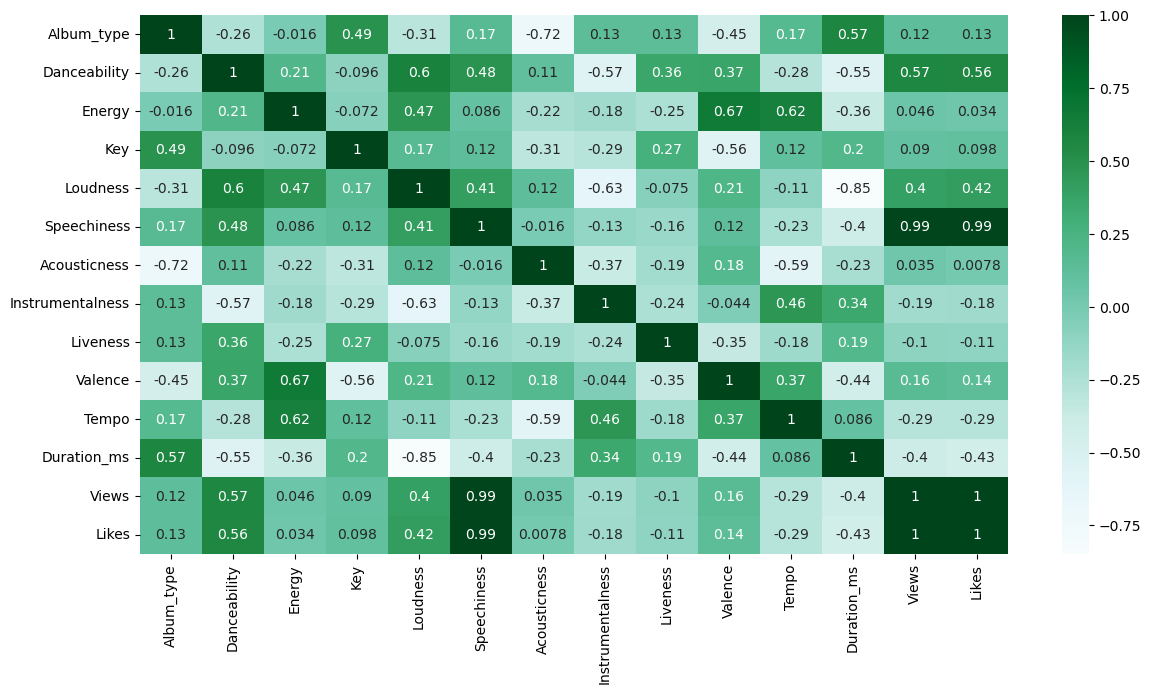

In [58]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,7))
corr_mat = (pd.DataFrame(df.take(10),columns = df.columns).corr())
sns.heatmap(corr_mat, annot=True, cmap="BuGn")
plt.show()

# Songs Pie Chart by Album type

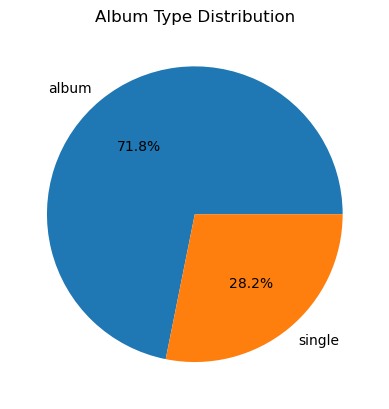

In [20]:
# group by Album_type and count the number of occurrences
album_type_counts = df.groupBy("Album_type").count().collect()

# create a list of labels and values for the pie chart
labels = [row["Album_type"] for row in album_type_counts]
values = [row["count"] for row in album_type_counts]

# plot the pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Album Type Distribution")
plt.show()

# Top 10 Artists by views

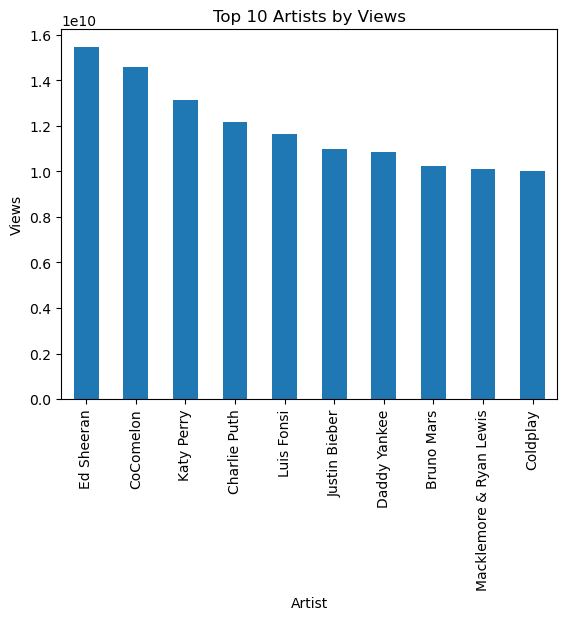

In [21]:
# group the DataFrame by artist, aggregate the views, and select the top 10 rows
top_10_artists_by_views = df.groupBy("Artist").agg({"Views": "sum"}).orderBy("sum(Views)", ascending=False).limit(10)

# convert the PySpark DataFrame to a Pandas DataFrame and create a bar plot
pandas_df = top_10_artists_by_views.toPandas()
pandas_df.plot(kind="bar", x="Artist", y="sum(Views)", legend=False)

# set the title and axis labels
plt.title("Top 10 Artists by Views")
plt.xlabel("Artist")
plt.ylabel("Views")

# display the plot
plt.show()

## Top Artists by Likes

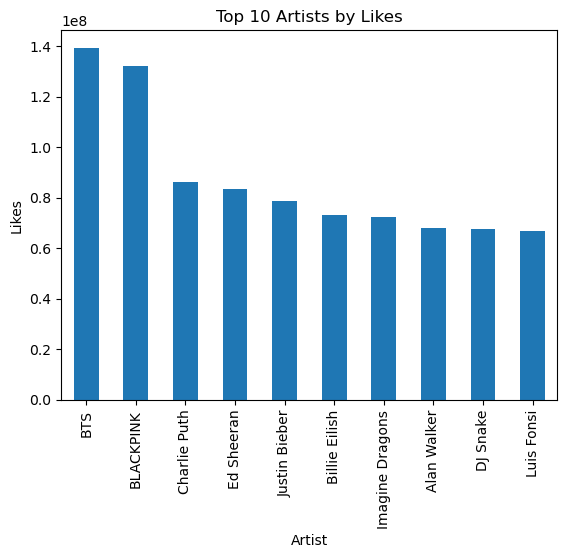

In [44]:
top_10_artists_by_likes = df.groupBy("Artist").agg({'Views': 'sum', 'Likes': 'sum'}).orderBy("sum(Likes)", ascending = False).limit(10)

top_10_artists_by_likes.toPandas().plot(kind="bar", x="Artist", y="sum(Likes)", legend = False)

plt.title("Top 10 Artists by Likes")
plt.xlabel("Artist")
plt.ylabel("Likes")
plt.show()

# Top 10 songs by views

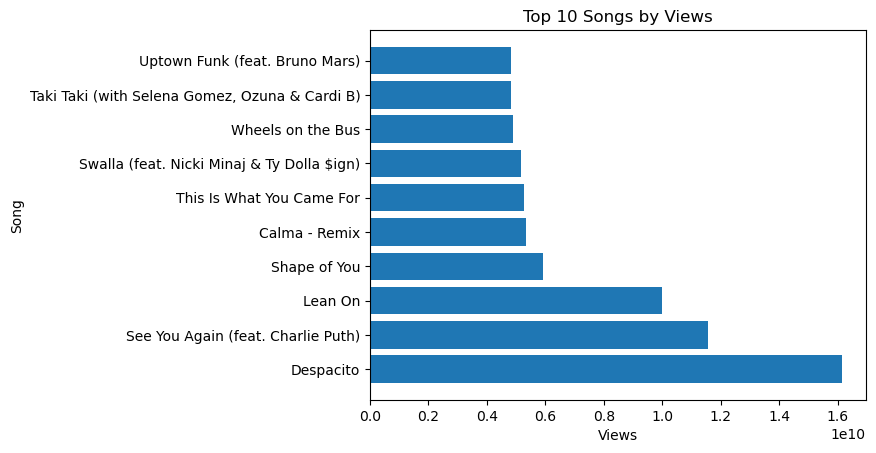

In [25]:
from pyspark.sql.functions import sum, desc

# group by the "Track" column and compute the sum of views
songs = df.groupBy("Track").agg(sum("Views").alias("TotalViews"))

# sort the DataFrame in descending order of views and take the top 10 rows
top_songs = songs.sort(desc("TotalViews")).limit(10)

# extract the song names and views as lists
song_names = top_songs.select("Track").rdd.flatMap(lambda x: x).collect()
views = top_songs.select("TotalViews").rdd.flatMap(lambda x: x).collect()

# plot the bar chart
plt.barh(song_names, views)
plt.xlabel("Views")
plt.ylabel("Song")
plt.title("Top 10 Songs by Views")
plt.show()

# Feature graph with songs

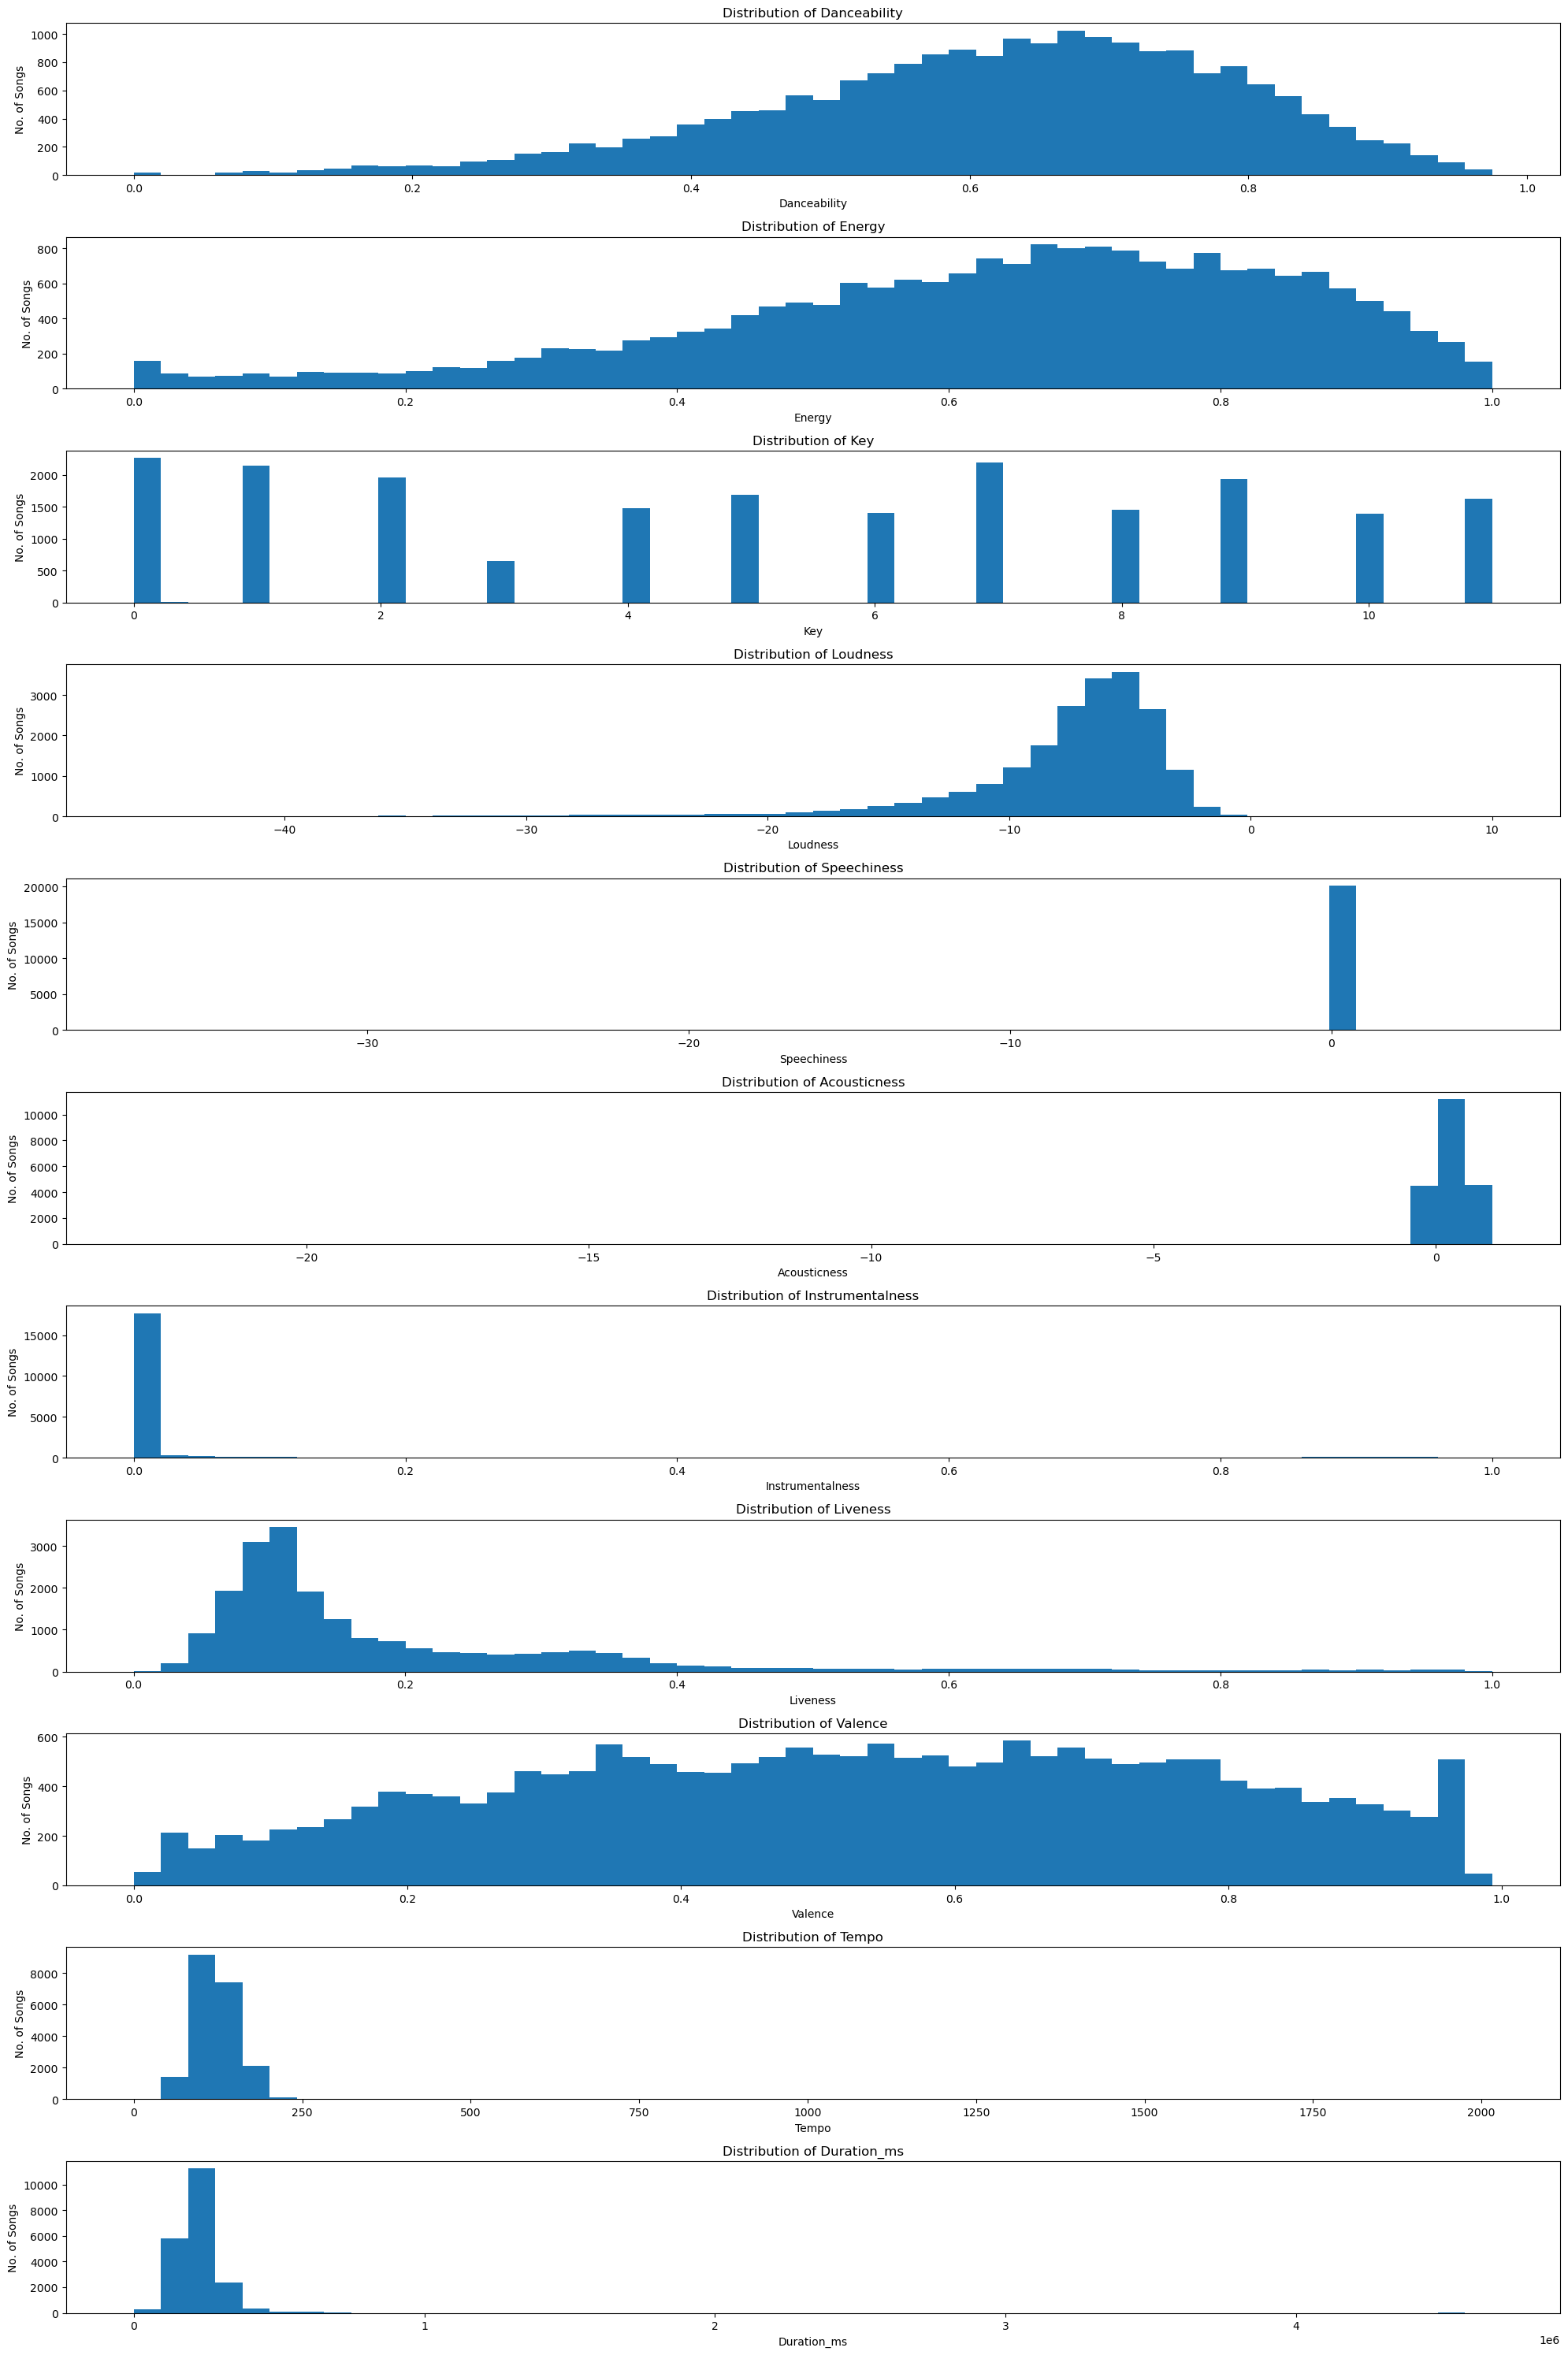

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# define the list of columns to plot
cols_to_plot = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

# set up the subplots
fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(20, 30))

# loop over the columns and plot a histogram for each one
for i, col in enumerate(cols_to_plot):
    # get the values of the column and remove any null values
    values = df.select(col).na.drop().rdd.flatMap(lambda x: x).collect()
    
    # plot the histogram
    axes[i].hist(values, bins=50)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("No. of Songs")
    axes[i].set_title("Distribution of " + col)

# adjust the spacing between the subplots
plt.tight_layout()

# show the plot
plt.show()

In [27]:
from pyspark.sql.functions import when

df = df.withColumn("Album_type", when(df["Album_type"] == "single", 0).otherwise(1))


In [31]:
df = df.na.drop(subset=['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes'])


In [32]:
from pyspark.sql.functions import isnan, when, count, col
#print(df.corr())

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+------+-----+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-----+-----------+-------+-----+-----+
|Artist|Track|Album|Album_type|Danceability|Energy|Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|Tempo|Duration_ms|Channel|Views|Likes|
+------+-----+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-----+-----------+-------+-----+-----+
|     0|    0|    0|         0|           0|     0|  0|       0|          0|           0|               0|       0|      0|    0|          0|      0|    0|    0|
+------+-----+-----+----------+------------+------+---+--------+-----------+------------+----------------+--------+-------+-----+-----------+-------+-----+-----+



# Correlation Matrix

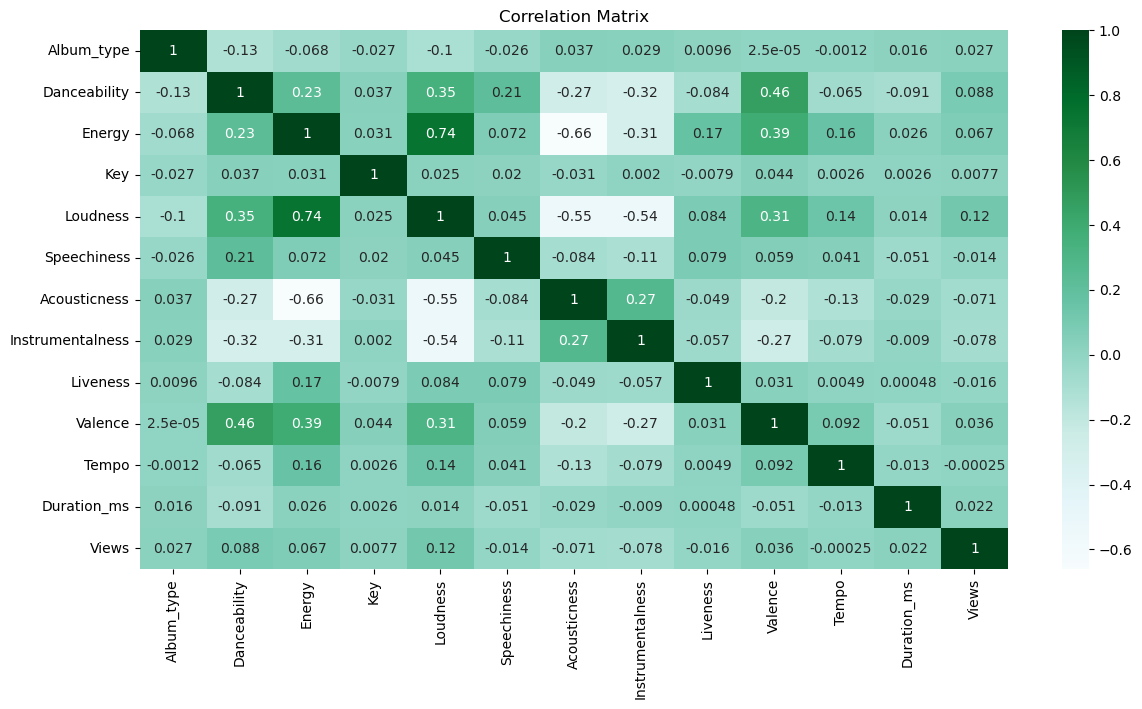

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.select(['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 
                'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views'])
df1 = df1.dropna()

corr_matrix1 = df1.select([c for c in df1.columns]).toPandas().corr()p(data=data.corr().round(2),annot=True,cmap="BuGn")

fig,ax=plt.subplots(figsize=(14, 7))
sns.heatmap(corr_matrix1, annot=True, cmap="BuGn")
plt.title('Correlation Matrix')
plt.show()

# 1. Linear Regression

## Model Training

In [34]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

df1 = df1.select(['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 
                  'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views'])
df1 = df1.dropna()

assembler = VectorAssembler(inputCols=['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 
                                       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views'],
                            outputCol='features')

data = assembler.transform(df1)
train, test = data.randomSplit([0.9, 0.1], seed=123)
# mean = 9.430687e+07
# create linear regression model and fit on train data
lr = LinearRegression(featuresCol='features', labelCol='Views')
model = lr.fit(train)

# make predictions on test data
predictions = model.transform(test)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)

print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))

23/04/28 08:51:28 WARN Instrumentation: [1fb2f4ab] regParam is zero, which might cause numerical instability and overfitting.
23/04/28 08:51:29 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/04/28 08:51:29 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


RMSE on test data: 7.866635881163074e-08
MAE on test data: 2.8790366230678742e-08


# Feature Selection

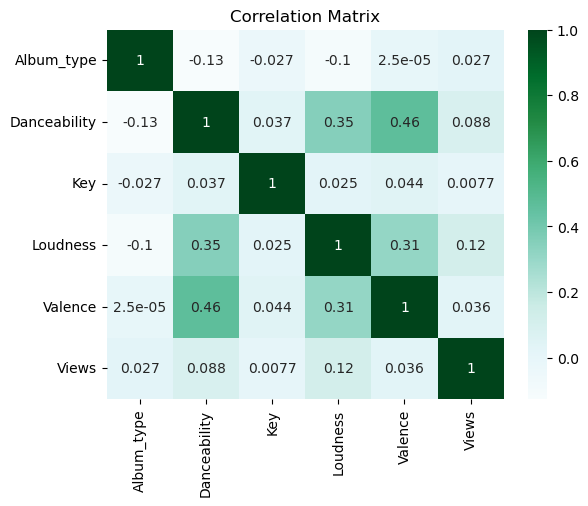

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# select relevant columns and drop rows with null values
df2 = df.select(['Album_type', 'Danceability', 'Key', 'Loudness',
                 'Valence', 'Views'])
df2 = df2.dropna()

# calculate correlation matrix
corr_matrix2 = df2.select([c for c in df2.columns]).toPandas().corr()

# plot heatmap
sns.heatmap(corr_matrix2, annot=True, cmap='BuGn')
plt.title('Correlation Matrix')
plt.show()


## Linear Regression

In [36]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# convert features to vector and split data into train and test sets
assembler = VectorAssembler(inputCols=['Album_type', 'Danceability', 'Key', 'Loudness','Valence', 'Views'],
                            outputCol='features')

data = assembler.transform(df2)
train, test = data.randomSplit([0.9, 0.1], seed=123)

# create linear regression model and fit on train data
lr = LinearRegression(featuresCol='features', labelCol='Views')
model = lr.fit(train)

# make predictions on test data
predictions = model.transform(test)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))

23/04/28 08:51:54 WARN Instrumentation: [11f0df82] regParam is zero, which might cause numerical instability and overfitting.


RMSE on test data: 1.4903295231344186e-07
MAE on test data: 1.1759805952636661e-07


## Evaluation

## 2. Decision Tree

In [37]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Select relevant columns and drop rows with null values
# df = df.select(['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
#                 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views'])
# df = df.dropna()

# Convert features to vector and split data into train and test sets
# assembler = VectorAssembler(inputCols=['Album_type', 'Danceability', 'Key', 'Loudness','Valence', 'Views'],
#                             outputCol='features')
# data = assembler.transform(df2)
# train, test = data.randomSplit([0.9, 0.1], seed=123)

# Create decision tree regression model and fit on train data
dt = DecisionTreeRegressor(featuresCol='features', labelCol='Views')
model = dt.fit(train)

# make predictions on test data
predictions = model.transform(test)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))

RMSE on test data: 89589631.67667675
MAE on test data: 17815692.278013498


## 3. Random Forrest Regression

In [38]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# # Convert features to vector and split data into train and test sets
# assembler = VectorAssembler(inputCols=['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
#                                         'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms'],
#                             outputCol='features')
# data = assembler.transform(df)
# train, test = data.randomSplit([0.9, 0.1], seed=123)

# Create random forest regression model and fit on train data
rf = RandomForestRegressor(featuresCol='features', labelCol='Views')
model = rf.fit(train)



# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))


RMSE on test data: 108743167.9840283
MAE on test data: 50996610.117251575


## 4. Gradient Boosted Tree Regression

In [39]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# create gradient boosted tree regression model and fit on train data
gbt = GBTRegressor(featuresCol='features', labelCol='Views', maxIter=10)
model = gbt.fit(train)

# make predictions on test data
predictions = model.transform(test)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))


RMSE on test data: 62990216.60397279
MAE on test data: 12623097.714274885


## 5. Generalized Linear Regression

In [40]:
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# create generalized linear regression model and fit on train data
glr = GeneralizedLinearRegression(featuresCol='features', labelCol='Views', family='gaussian')
model = glr.fit(train)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))

23/04/28 08:52:23 WARN Instrumentation: [63e096ba] regParam is zero, which might cause numerical instability and overfitting.


RMSE on test data: 3.57204224599175e-08
MAE on test data: 2.26373737453758e-08


## 6. Isotonic Regression

In [41]:
from pyspark.ml.regression import IsotonicRegression
from pyspark.ml.evaluation import RegressionEvaluator

# create isotonic regression model and fit on train data
ir = IsotonicRegression(featuresCol='features', labelCol='Views')
model = ir.fit(train)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))


RMSE on test data: 218019576.348479
MAE on test data: 111387105.47647773


## 6. Survival Regression

In [42]:
# from pyspark.ml.regression import SurvivalRegression
from pyspark.ml.regression import AFTSurvivalRegression as SurvivalRegression
from pyspark.ml.evaluation import RegressionEvaluator

# create AFTSurvivalRegression model and fit on train data
aft = SurvivalRegression(featuresCol='features', censorCol='Views', quantileProbabilities=[0.5])
model = aft.fit(train)

# make predictions on test data
predictions = model.transform(test)

# define the evaluation metric
evaluator = RegressionEvaluator(labelCol='Views', predictionCol='prediction', metricName='rmse')

# make predictions on test data
predictions = model.transform(test)

# evaluate the performance of the model on test data
rmse = evaluator.evaluate(predictions)

# calculate the MAE
evaluator.setMetricName('mae')
mae = evaluator.evaluate(predictions)
print('RMSE on test data: {}'.format(rmse))
print('MAE on test data: {}'.format(mae))



IllegalArgumentException: label does not exist. Available: Album_type, Danceability, Key, Loudness, Valence, Views, features